# Task_1: Prediction using Supervised ML
We have to predict the percentage of an student based on the no.of study hours

## Author: Abhishek Kumar

In [1]:
#Packages for data handling
import pandas as pd
import numpy as np

#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for predictive modelling
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#for evaluation of model
from sklearn import metrics

## Reading of data

In [2]:
data=pd.read_csv('http://bit.ly/w-data')

In [3]:
df=pd.DataFrame(data)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From above data we extract that:

1)There is no null value.

2)Both have numerical data only.

## Data Visualisation

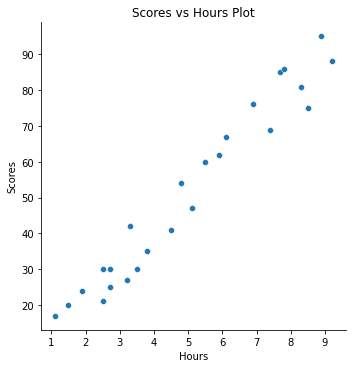

In [6]:
sns.relplot(x='Hours',y='Scores',data=df,kind='scatter')
plt.title('Scores vs Hours Plot')
plt.show()

We can say that there is a linear relation between number of hours studied and marks obtained.

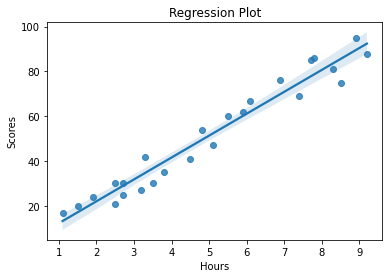

In [7]:
sns.regplot(x='Hours',y='Scores',data=df)
plt.title('Regression Plot')
plt.show()

In [8]:
#correlation matrix
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


It is clear that variables are positively correlated

## Splitting the data for model building

In [9]:
y=df['Scores']
x=df[['Hours']]

In [10]:
#Divide the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
#verify the no. of elements in the training and testing
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


## Building linear regression model

In [12]:
lm=sn.OLS(y_train,x_train).fit()

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Scores   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2111.
Date:                Sat, 06 Aug 2022   Prob (F-statistic):                    6.12e-21
Time:                        01:06:49   Log-Likelihood:                         -62.925
No. Observations:                  20   AIC:                                      127.8
Df Residuals:                      19   BIC:                                      128.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hours         10.2251      0.223     45.950      0.000       9.759      10.691
==============================================================================
Omnibus:                        2.581   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                1.529
Skew:                          -0.410   Prob(JB):                        0.466
Kurtosis:                       1.922   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#predicting the score
y_pred=lm.predict(x_test)

In [15]:
print(y_pred)

5     15.337585
2     32.720181
19    75.665418
16    25.562641
11    60.327833
dtype: float64


In [16]:
#Comparing Actual vs Predicted Scores
compare_score=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [17]:
compare_score

,Actual,Predicted
5,20,15.337585
2,27,32.720181
19,69,75.665418
16,30,25.562641
11,62,60.327833


In [18]:
#Prediction of given value
hours=9.25
pred_score=lm.predict(hours)
print('Predicted Score:',pred_score)

Predicted Score: [94.58177251]


## Evaluating the model

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.631507908193602
